In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('HW3Data.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


In [4]:
df.shape

(62, 2001)

In [5]:
X = df.iloc[:,1:2000].values
Y = df.iloc[:,0].values

In [6]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [7]:
svc = SVC(kernel="linear")
m=RFECV(estimator=svc,step=1, cv=StratifiedKFold(9),
              scoring='accuracy')

In [8]:
m.fit(X,Y)

RFECV(cv=StratifiedKFold(n_splits=9, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features : 59
Ranking of features : [1184 1530  886 ... 1570  196  273]


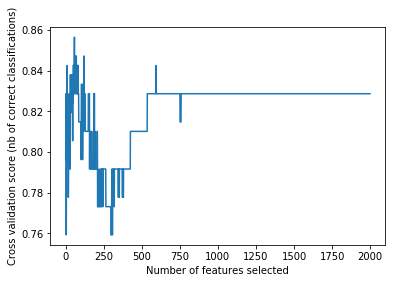

In [11]:
import matplotlib.pyplot as plt
print("Optimal number of features : %d" % m.n_features_)
print("Ranking of features : %s" % m.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(m.grid_scores_) + 1), m.grid_scores_)
plt.show()

In [12]:
X.shape

(62, 1999)

In [13]:
m.transform(X).shape

(62, 59)

In [14]:
Z=m.transform(X)
Z.shape

(62, 59)

In [15]:
m.score(X,Y)

1.0

In [16]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, Y_train, Y_test = \
    train_test_split(Z, Y, 
                     test_size=0.20,
                     random_state=1)

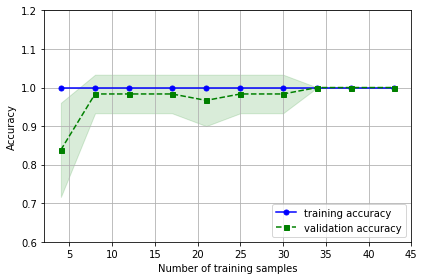

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=svc,
                               X=Z_train,
                               y=Y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.2])
plt.tight_layout()
plt.show()

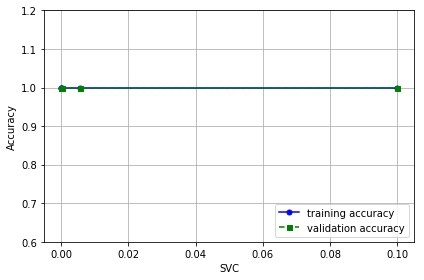

In [18]:
#plot validation curves
from sklearn.model_selection import validation_curve


param_range =np.logspace(-6, -1, 5)

train_scores, test_scores = validation_curve(
                estimator=svc, 
                X=Z_train, 
                y=Y_train, 
                param_name = 'gamma', 
                param_range=param_range,
                cv=10
                )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('SVC')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.2])
plt.tight_layout()
plt.show()